In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)


In [2]:
data= pd.read_csv('data/Airline_review2.csv')
data.shape

(23852, 20)

In [3]:
data.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [4]:
data['Airline Name'].value_counts(dropna=False)
    #study of 510 airlines

Airline Name
Jet Airways               100
Saudi Arabian Airlines    100
SilkAir                   100
flydubai                  100
LOT Polish Airlines       100
                         ... 
EWA Air                     1
Iberojet                    1
Mack Air                    1
Ariana Afghan Airlines      1
KD Air                      1
Name: count, Length: 510, dtype: int64

In [5]:
data.info()
    # dates are 'object' instead of date format
    #NaN values present in both numeric and categorical columns
    #Overall_Rating type is 'object'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23852 entries, 0 to 23851
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23852 non-null  int64  
 1   Airline Name            23852 non-null  object 
 2   Overall_Rating          23852 non-null  object 
 3   Review_Title            23852 non-null  object 
 4   Review Date             23852 non-null  object 
 5   Verified                23852 non-null  bool   
 6   Review                  23852 non-null  object 
 7   Aircraft                7407 non-null   object 
 8   Type Of Traveller       20185 non-null  object 
 9   Seat Type               22769 non-null  object 
 10  Route                   20092 non-null  object 
 11  Date Flown              20170 non-null  object 
 12  Seat Comfort            19787 non-null  float64
 13  Cabin Staff Service     19661 non-null  float64
 14  Food & Beverages        14983 non-null

* Standardizing column names and dealing with date variables

In [6]:
#dropping first column (unnamed):

data = data.drop(['Unnamed: 0'], axis=1)
data

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23847,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,Bangkok to Tokyo,June 2022,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no
23848,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
23849,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no
23850,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes


In [7]:
#renaming columns to follow the PE8 conventions:

def standardise_column_names(df):
    for columns in df.columns:
        c_low = columns.lower()
        c_standard = '_'.join(c_low.split(' '))
        df.rename({columns: c_standard}, inplace=True, axis=1)
    return df

data = standardise_column_names(data)
data.head()

,airline_name,overall_rating,review_title,review_date,verified,review,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [8]:
#Converting date_flown to date format and extracting month and year in new columns:

data['date_flown'] = pd.to_datetime(data['date_flown'], format = '%B %Y')

data['month_flown'] = data['date_flown'].dt.month_name()
data['year_flown'] = data['date_flown'].dt.year
data

,airline_name,overall_rating,review_title,review_date,verified,review,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,recommended,month_flown,year_flown
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,2019-11-01,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,November,2019.0
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,2019-06-01,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,June,2019.0
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,2019-06-01,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,June,2019.0
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,2019-09-01,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,September,2019.0
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,2019-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,September,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23847,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,Bangkok to Tokyo,2022-06-01,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no,June,2022.0
23848,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no,June,2022.0
23849,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,2022-05-01,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no,May,2022.0
23850,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,2022-05-01,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes,May,2022.0


In [9]:
#Converting review_date to date format
data['review_month'] = data['review_date'].str.split(' ').str[1]
data['review_year'] = data['review_date'].str.split(' ').str[-1]
data['date_review'] = data['review_month'] + ' ' + data['review_year']

data['date_review'] = pd.to_datetime(data['date_review'], format = '%B %Y')
data = data.drop(['review_date'], axis=1)
data

,airline_name,overall_rating,review_title,verified,review,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,recommended,month_flown,year_flown,review_month,review_year,date_review
0,AB Aviation,9,"""pretty decent airline""",True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,2019-11-01,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,November,2019.0,November,2019,2019-11-01
1,AB Aviation,1,"""Not a good airline""",True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,2019-06-01,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,June,2019.0,June,2019,2019-06-01
2,AB Aviation,1,"""flight was fortunately short""",True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,2019-06-01,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,June,2019.0,June,2019,2019-06-01
3,Adria Airways,1,"""I will never fly again with Adria""",False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,2019-09-01,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,September,2019.0,September,2019,2019-09-01
4,Adria Airways,1,"""it ruined our last days of holidays""",True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,2019-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,September,2019.0,September,2019,2019-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23847,ZIPAIR,1,"""customer service is terrible""",False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,Bangkok to Tokyo,2022-06-01,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no,June,2022.0,July,2022,2022-07-01
23848,ZIPAIR,1,"""Avoid at all costs""",True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no,June,2022.0,June,2022,2022-06-01
23849,ZIPAIR,3,"""Will not recommend to anyone""",True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,2022-05-01,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no,May,2022.0,May,2022,2022-05-01
23850,ZIPAIR,6,"""It was immaculately clean""",True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,2022-05-01,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes,May,2022.0,May,2022,2022-05-01


In [10]:
#Calculating time passed between flight and review:
data['time_before_review'] = data['date_review'] - data['date_flown']
data['time_before_review'] = data['time_before_review'].dt.days

#dropping date_review and date_flown now that informations have been extracted:
data = data.drop(['date_flown'], axis=1)
data = data.drop(['date_review'], axis=1)
data['time_before_review'].value_counts(dropna= False)

#negative values due to the fact that some reviews were published earlier than the flight (might be due to some user input error) 

time_before_review
 0.0       13996
 NaN        3682
 31.0       2212
 30.0       1134
 61.0        529
           ...  
 426.0         1
 518.0         1
-31.0          1
 1064.0        1
-120.0         1
Name: count, Length: 63, dtype: int64

* Checking and dealing with NaN values

In [11]:
data.isna().sum()

airline_name                  0
overall_rating                0
review_title                  0
verified                      0
review                        0
aircraft                  16445
type_of_traveller          3667
seat_type                  1083
route                      3760
seat_comfort               4065
cabin_staff_service        4191
food_&_beverages           8869
ground_service             4640
inflight_entertainment    12669
wifi_&_connectivity       17426
value_for_money            1052
recommended                   0
month_flown                3682
year_flown                 3682
review_month                  0
review_year                   0
time_before_review         3682
dtype: int64

In [12]:
#Replacing NaN values with 'Unknown':
list1 = ['aircraft','type_of_traveller', 'seat_type', 'route', 'month_flown', 'year_flown']

for column in data.columns:
    if column in list1:
        data[column] = data[column].fillna('Unknown')

data.isna().sum()

airline_name                  0
overall_rating                0
review_title                  0
verified                      0
review                        0
aircraft                      0
type_of_traveller             0
seat_type                     0
route                         0
seat_comfort               4065
cabin_staff_service        4191
food_&_beverages           8869
ground_service             4640
inflight_entertainment    12669
wifi_&_connectivity       17426
value_for_money            1052
recommended                   0
month_flown                   0
year_flown                    0
review_month                  0
review_year                   0
time_before_review         3682
dtype: int64

In [13]:
#Replacing NaN values with mean:
list2 = ['seat_comfort','cabin_staff_service', 'food_&_beverages', 'ground_service', 'inflight_entertainment', 'wifi_&_connectivity', 'value_for_money']

for column in data.columns:
    if column in list2:
        data[column] = data[column].fillna(round((data[column].mean()),2))

data.isna().sum()

airline_name                 0
overall_rating               0
review_title                 0
verified                     0
review                       0
aircraft                     0
type_of_traveller            0
seat_type                    0
route                        0
seat_comfort                 0
cabin_staff_service          0
food_&_beverages             0
ground_service               0
inflight_entertainment       0
wifi_&_connectivity          0
value_for_money              0
recommended                  0
month_flown                  0
year_flown                   0
review_month                 0
review_year                  0
time_before_review        3682
dtype: int64

* Data wrangling

In [14]:
#creating categories and cleaning NaN values for 'time_before_review':

def clean_time_review(x):
    if x<=31:
        return '1 month'
    elif 31<x<=92:
        return '2-3 months'
    elif x>92:
        return '+3 months'
    else:
        return 'Unknown'
        
data['time_before_review'] = list(map(clean_time_review, data['time_before_review']))
data['time_before_review'].value_counts(dropna=False)

time_before_review
1 month       17624
Unknown        3682
+3 months      1291
2-3 months     1255
Name: count, dtype: int64

In [15]:
#Wrangling the route column
route_list = data['route'].tolist()
route_list

['Moroni to Moheli',
 'Moroni to Anjouan',
 'Anjouan to Dzaoudzi',
 'Frankfurt to Pristina',
 'Sofia to Amsterdam via Ljubljana',
 'Sarajevo to Ljubljana',
 'Ljubljana to Zürich',
 'Timisoara to Munich',
 'Pristina to Zürich via Ljubliana',
 'Ljubljana to Munich',
 'Zurich to Ljubljana',
 'Vienna to Sofia',
 'Paris to Skopje via Ljubljana',
 'Ljubljana to Munich',
 'Ljubljana to Prague',
 'Frankfurt to Ljubljana',
 'Ljubljana to Frankfurt',
 'Ljubljana to Vienna',
 'Ljubljana to Sarajevo',
 'Zurich to Ljubjana',
 'Ljubljana to Munich ',
 'Ljubljana to Zurich',
 'LJU to VIE',
 'LJU to VIE',
 'LJU to CPH',
 'CDG to LJU',
 'MUC to LJU',
 'LJU to AMS',
 'LJU to BRU',
 'MAN to LJU',
 'LGW to LJU',
 'TLL to ARN',
 'ZRH to LJU',
 'LJU to ZRH',
 'LCJ to CDG',
 'MUC to PRN',
 'LJU to AMS',
 'Ljubljana to Moscow',
 'SKP to LJU',
 'Frankfurt to Ljubljana',
 'Ljubljana to Brussels',
 'Manchester to Ljubljana',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Un

In [16]:
#Extracting departure location from route column:
data['departure_place'] = data['route'].str.split(' to ').str[0].fillna('Unknown')
display(data['departure_place'].value_counts(dropna=False))

departure_place
Unknown         3760
Bangkok          481
London           456
Toronto          397
Singapore        323
                ... 
Göteborg           1
Crete Chania       1
Singapure          1
Cotonou            1
Narita             1
Name: count, Length: 2280, dtype: int64

In [17]:
#Extracting arrival location from route column:
data['arrival_place'] = data['route'].str.split(' to ').str[1].fillna('Unknown')
data['arrival_place'] = data['arrival_place'].str.split(' via ').str[0].fillna('Unknown')
display(data['arrival_place'].value_counts(dropna=False))

arrival_place
Unknown                         3789
Bangkok                          513
London                           346
Singapore                        294
Toronto                          284
                                ... 
Réunion                            1
Pointe-à-Pitre / Martinique        1
Dzaoudzi                           1
Ohrid                              1
Tokio                              1
Name: count, Length: 2789, dtype: int64

In [18]:
#Checking if splitting worked correctly to extract locations and dropping 'route' if it did
display(data[data['route']=='Manchester to Monterrey via Amsterdam & Mexico City'])
data = data.drop(['route'], axis=1)

,airline_name,overall_rating,review_title,verified,review,aircraft,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,recommended,month_flown,year_flown,review_month,review_year,time_before_review,departure_place,arrival_place
609,Aeromexico,1,"""you’ll be delayed on every step of your journey""",True,Not worth it. An overpriced piece of garbage ...,Unknown,Business,Economy Class,Manchester to Monterrey via Amsterdam & Mexico...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,no,June,2022.0,June,2022,1 month,Manchester,Monterrey


In [19]:
#Looking for mention of delays or cancellation in reviews:
def mention_delay(x):
    list3=['delay', 'delays', 'late', 'delayed', 'cancel', 'cancelled', 'cancellation']
    string_set= set(x.lower().split())
    list_set = set(list3)
    if list_set.intersection(string_set):
        return 'True'
    else:
        return 'False'
        
data['delay_cancellation'] = list(map(mention_delay, data['review']))
data['delay_cancellation'].value_counts(dropna=False)

delay_cancellation
False    16149
True      7703
Name: count, dtype: int64

In [20]:
data.head(3)

,airline_name,overall_rating,review_title,verified,review,aircraft,type_of_traveller,seat_type,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,recommended,month_flown,year_flown,review_month,review_year,time_before_review,departure_place,arrival_place,delay_cancellation
0,AB Aviation,9,"""pretty decent airline""",True,Moroni to Moheli. Turned out to be a pretty ...,Unknown,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,2.15,1.81,3.0,yes,November,2019.0,November,2019,1 month,Moroni,Moheli,False
1,AB Aviation,1,"""Not a good airline""",True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,2.15,1.81,2.0,no,June,2019.0,June,2019,1 month,Moroni,Anjouan,False
2,AB Aviation,1,"""flight was fortunately short""",True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,2.15,1.81,2.0,no,June,2019.0,June,2019,1 month,Anjouan,Dzaoudzi,False


In [21]:
#I won't be using review_title or review columns for the next step of my analysis so I'll drop them now:
data = data.drop(['review_title'], axis=1)
data = data.drop(['review'], axis=1)

In [22]:
#Checking unique values for each columns:
for columns in data.columns:
    print(data[columns].value_counts(dropna=False))
    print('')

#overall_rating: n value should be 10
#unusual values for aircraft too

airline_name
Jet Airways               100
Saudi Arabian Airlines    100
SilkAir                   100
flydubai                  100
LOT Polish Airlines       100
                         ... 
EWA Air                     1
Iberojet                    1
Mack Air                    1
Ariana Afghan Airlines      1
KD Air                      1
Name: count, Length: 510, dtype: int64

overall_rating
1    12043
2     2331
9     1821
8     1799
3     1448
7     1188
5      860
4      845
n      824
6      693
Name: count, dtype: int64

verified
True     12677
False    11175
Name: count, dtype: int64

aircraft
Unknown                                       16446
A320                                           1110
Boeing 737-800                                  572
Boeing 737                                      415
A330                                            353
                                              ...  
Boeing 777-300 A350                               1
A330-300, Boeing 777-300ER

In [23]:
#cleaning overall_rating and setting type as numeric
def clean_overall_rating(x):
    if x=='n':
        return 10
    else:
        return x
        
data['overall_rating'] = list(map(clean_overall_rating, data['overall_rating']))
data['overall_rating'] = pd.to_numeric(data['overall_rating'], downcast = 'integer')
data['overall_rating'].value_counts(dropna=False)

overall_rating
1     12043
2      2331
9      1821
8      1799
3      1448
7      1188
5       860
4       845
10      824
6       693
Name: count, dtype: int64

In [24]:
#cleaning aircraft = keeping only first aircraft name:
data['aircraft'].value_counts(dropna=False)
data['aircraft'] = data['aircraft'].str.split(',').str[0]
data['aircraft'] = data['aircraft'].str.split('/').str[0]

#I'll also keep the 25 most represented aircrafts (n~>50) while grouping the others in 'Others'
aircrafts=data['aircraft'].value_counts(dropna=False)
aircrafts=aircrafts.reset_index()
aircrafts.head(25)

def clean_aircraft(x):
    keep=['Unknown','A320','Boeing 737-800','Boeing 737','A330','Boeing 787','A321','A319','Boeing 787-9','A330-300','Boeing 777','A350','A320-200',
          'A330-200','Boeing 777-300ER','Boeing 777-300','A350-900','Boeing 787-8','A380','A340','E190',
          'Boeing 757','Boeing 767','Boeing 737-700','Boeing 787']
    if x not in keep:
        return 'Others'
    else:
        return x
        
data['aircraft'] = list(map(clean_aircraft, data['aircraft']))
data['aircraft'].value_counts(dropna=False)

aircraft
Unknown             16446
Others               2496
A320                 1130
Boeing 737-800        575
Boeing 737            421
A330                  358
Boeing 787            336
A321                  298
A319                  240
Boeing 787-9          176
A330-300              171
Boeing 777            159
A350                  135
A320-200              112
A330-200              108
Boeing 777-300ER       99
Boeing 777-300         87
A350-900               80
Boeing 787-8           78
A380                   73
A340                   70
E190                   56
Boeing 757             51
Boeing 767             49
Boeing 737-700         48
Name: count, dtype: int64

In [25]:
data.to_csv('data/airlines_cleaned.csv', index=False)

* Exploratory Data Analysis

    *Overview of the dataset

In [26]:
display(data.shape)
display(data.head())

(23852, 22)

,airline_name,overall_rating,verified,aircraft,type_of_traveller,seat_type,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,recommended,month_flown,year_flown,review_month,review_year,time_before_review,departure_place,arrival_place,delay_cancellation
0,AB Aviation,9,True,Unknown,Solo Leisure,Economy Class,4.0,5.0,4.00,4.0,2.15,1.81,3.0,yes,November,2019.0,November,2019,1 month,Moroni,Moheli,False
1,AB Aviation,1,True,Others,Solo Leisure,Economy Class,2.0,2.0,1.00,1.0,2.15,1.81,2.0,no,June,2019.0,June,2019,1 month,Moroni,Anjouan,False
2,AB Aviation,1,True,Others,Solo Leisure,Economy Class,2.0,1.0,1.00,1.0,2.15,1.81,2.0,no,June,2019.0,June,2019,1 month,Anjouan,Dzaoudzi,False
3,Adria Airways,1,False,Unknown,Solo Leisure,Economy Class,1.0,1.0,2.56,1.0,2.15,1.81,1.0,no,September,2019.0,September,2019,1 month,Frankfurt,Pristina,True
4,Adria Airways,1,True,Unknown,Couple Leisure,Economy Class,1.0,1.0,1.00,1.0,1.00,1.00,1.0,no,September,2019.0,September,2019,1 month,Sofia,Amsterdam,True


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23852 entries, 0 to 23851
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   airline_name            23852 non-null  object 
 1   overall_rating          23852 non-null  int8   
 2   verified                23852 non-null  bool   
 3   aircraft                23852 non-null  object 
 4   type_of_traveller       23852 non-null  object 
 5   seat_type               23852 non-null  object 
 6   seat_comfort            23852 non-null  float64
 7   cabin_staff_service     23852 non-null  float64
 8   food_&_beverages        23852 non-null  float64
 9   ground_service          23852 non-null  float64
 10  inflight_entertainment  23852 non-null  float64
 11  wifi_&_connectivity     23852 non-null  float64
 12  value_for_money         23852 non-null  float64
 13  recommended             23852 non-null  object 
 14  month_flown             23852 non-null

    *Visualizing categorical variables distribution

In [28]:
categorical_df=data.select_dtypes(include=['object','bool'])
categorical_df

,airline_name,verified,aircraft,type_of_traveller,seat_type,recommended,month_flown,year_flown,review_month,review_year,time_before_review,departure_place,arrival_place,delay_cancellation
0,AB Aviation,True,Unknown,Solo Leisure,Economy Class,yes,November,2019.0,November,2019,1 month,Moroni,Moheli,False
1,AB Aviation,True,Others,Solo Leisure,Economy Class,no,June,2019.0,June,2019,1 month,Moroni,Anjouan,False
2,AB Aviation,True,Others,Solo Leisure,Economy Class,no,June,2019.0,June,2019,1 month,Anjouan,Dzaoudzi,False
3,Adria Airways,False,Unknown,Solo Leisure,Economy Class,no,September,2019.0,September,2019,1 month,Frankfurt,Pristina,True
4,Adria Airways,True,Unknown,Couple Leisure,Economy Class,no,September,2019.0,September,2019,1 month,Sofia,Amsterdam,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23847,ZIPAIR,False,Unknown,Couple Leisure,Economy Class,no,June,2022.0,July,2022,1 month,Bangkok,Tokyo,False
23848,ZIPAIR,True,Unknown,Solo Leisure,Economy Class,no,June,2022.0,June,2022,1 month,Singapore,Tokyo,False
23849,ZIPAIR,True,Unknown,Business,Economy Class,no,May,2022.0,May,2022,1 month,Bangkok,Tokyo,False
23850,ZIPAIR,True,Others,Business,Business Class,yes,May,2022.0,May,2022,1 month,Tokyo,Los Angeles,False


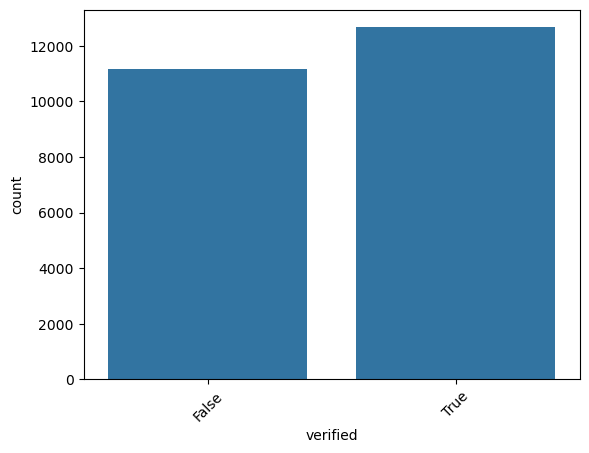

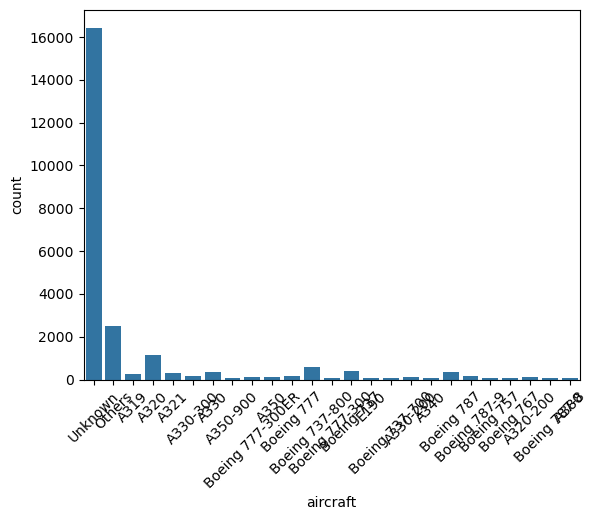

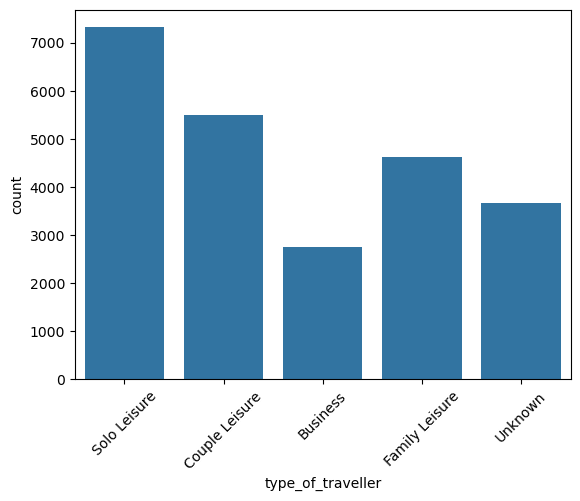

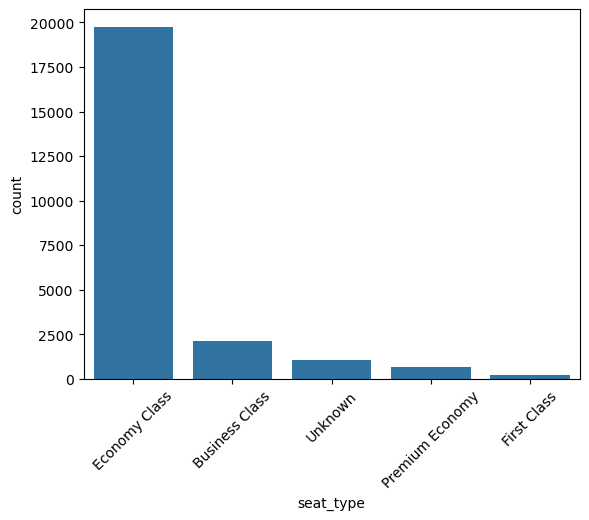

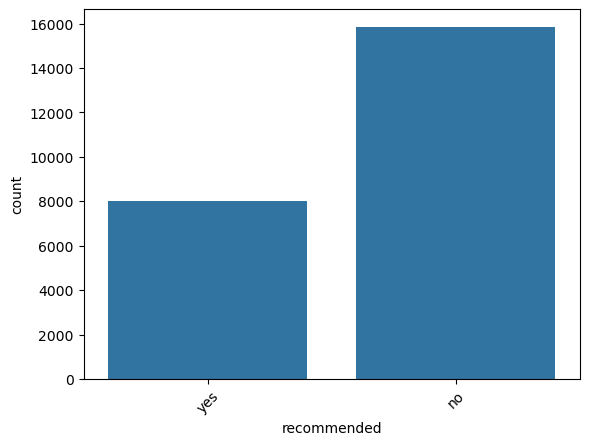

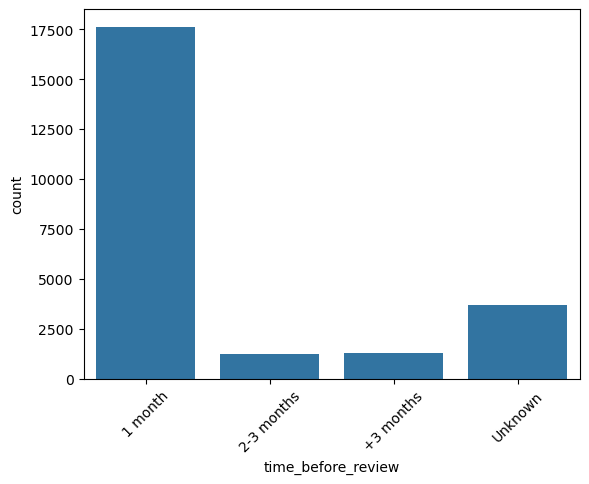

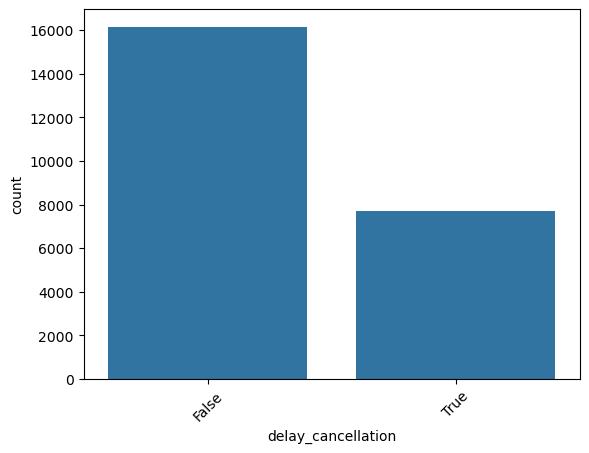

In [29]:
# Plotting the data
#there are too many values to plot the airlines name, departure/arrival locations and I'll plot the time varaiables separately so:
cat_df=categorical_df.drop(['airline_name','departure_place','arrival_place','month_flown','review_month','year_flown','review_year'],axis=1)

for columns in cat_df:
    sns.countplot(x=cat_df[columns], data=cat_df)
    plt.xticks(rotation=45)
    plt.show()

#majority of the reviews are verified and made by leisure travellers (majority of solo type)
#majority of them fly in economy class and mentioned delay in their reviews
#majority of the reviews were posted during the month of the flight and would not recommend the airlines

    *Plotting the time variables

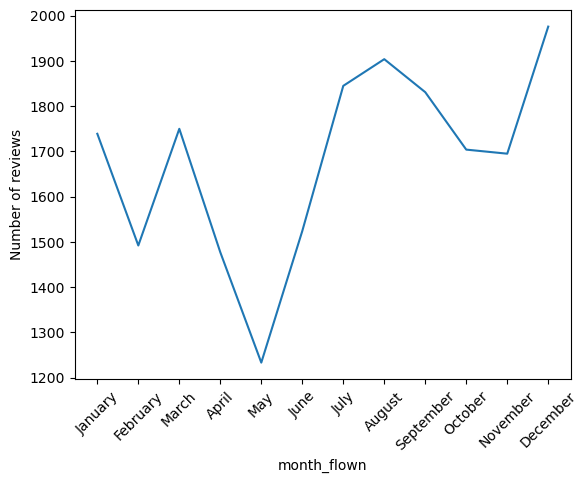

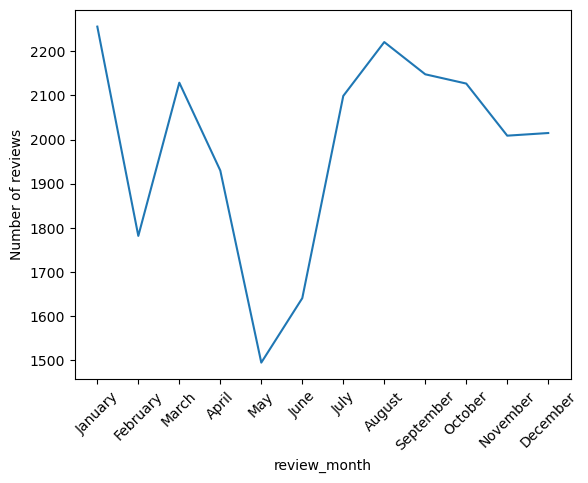

In [30]:
for column in categorical_df:
    list5= ['month_flown', 'review_month']
    months_order=['January','February','March','April','May','June','July','August','September','October','November','December']
    if column in list5:
        column_df=categorical_df.groupby([column], as_index=False)['airline_name'].count()
        i=column_df[column_df[column]=='Unknown'].index
        column_df=column_df.drop(i)
        column_df[column] = pd.Categorical(column_df[column], categories=months_order, ordered=True)
        column_df.sort_values(by=f'{column}', ascending=True,inplace=True)
        plt.plot(column_df[column], column_df['airline_name'])
        plt.xlabel(f'{column}')
        plt.ylabel('Number of reviews')
        plt.xticks(rotation=45)
        plt.show()

#There is some superposition between the time of flight and time of review which is normal since we've previously seen that most reviews are posted in the same month as the flight
#majority of flights/reviews take place during holiday periods (summer, spring and winter holidays)

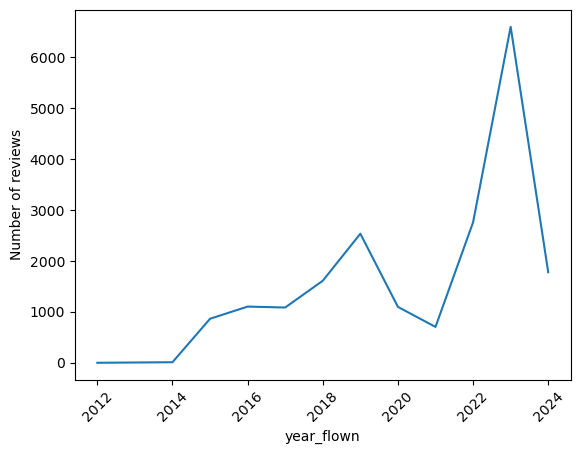

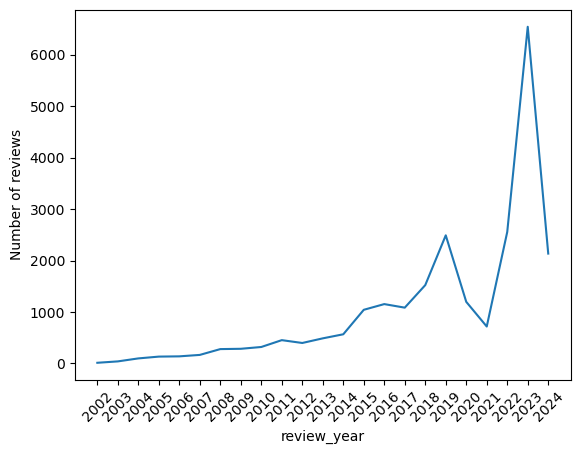

In [31]:
for column in categorical_df:
    list4= ['year_flown', 'review_year']
    if column in list4:
        column_df=categorical_df.groupby([column], as_index=False)['airline_name'].count()
        i=column_df[column_df[column]=='Unknown'].index
        column_df=column_df.drop(i)
        plt.plot(column_df[column], column_df['airline_name'])
        plt.xlabel(f'{column}')
        plt.ylabel('Number of reviews')
        plt.xticks(rotation=45)
        plt.show()

#there is a noticeable increase in number of reviews during the last 3 years following the lockdown period
#probably due to an increase in people travelling

    *Visualizing numerical variables distribution

In [32]:
numerical_df=data.select_dtypes('number')
numerical_df
#Due to the rating system being on a scale of 1 to 5 for each categories (10 for overall rating), our numerical variables are only discrete variables

,overall_rating,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money
0,9,4.0,5.00,4.00,4.00,2.15,1.81,3.0
1,1,2.0,2.00,1.00,1.00,2.15,1.81,2.0
2,1,2.0,1.00,1.00,1.00,2.15,1.81,2.0
3,1,1.0,1.00,2.56,1.00,2.15,1.81,1.0
4,1,1.0,1.00,1.00,1.00,1.00,1.00,1.0
...,...,...,...,...,...,...,...,...
23847,1,2.0,1.00,2.56,1.00,1.00,1.00,1.0
23848,1,2.6,2.87,2.56,2.36,2.15,1.81,1.0
23849,3,2.0,4.00,2.00,1.00,2.15,1.81,2.0
23850,6,3.0,4.00,3.00,1.00,2.00,5.00,5.0


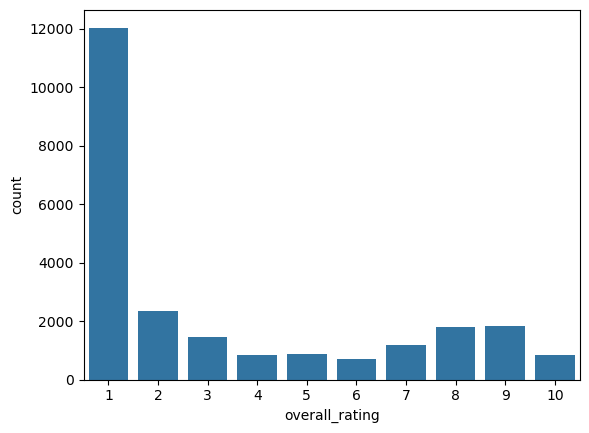

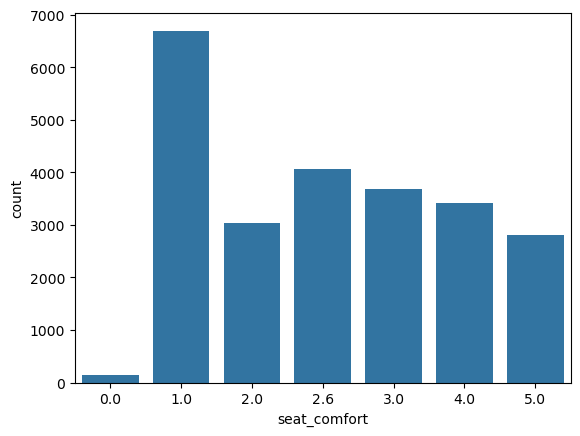

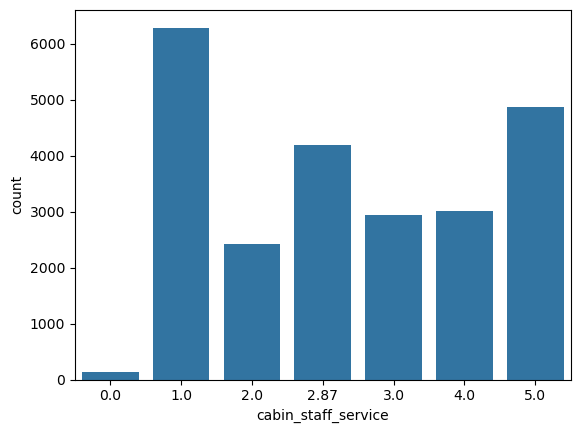

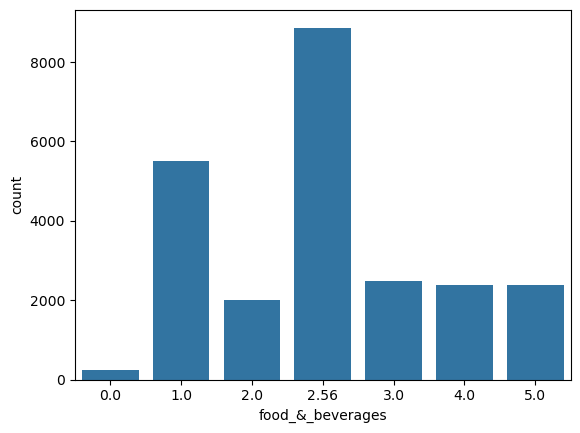

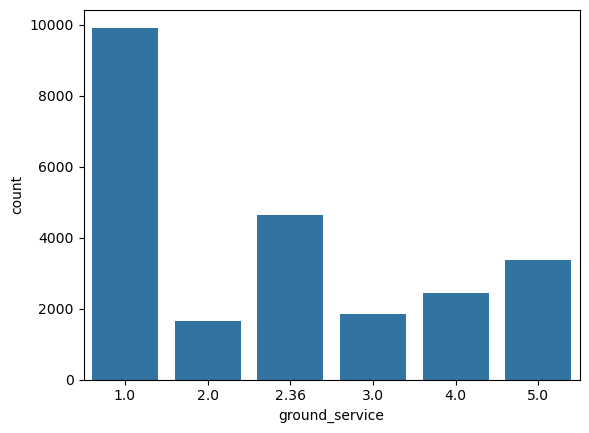

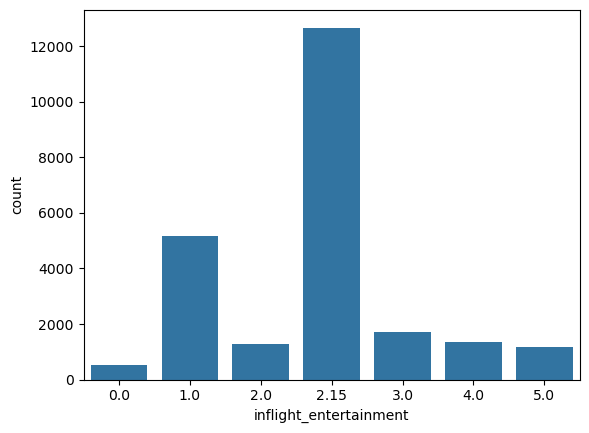

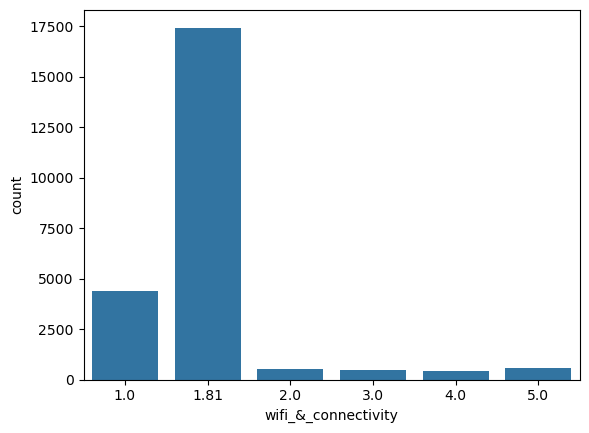

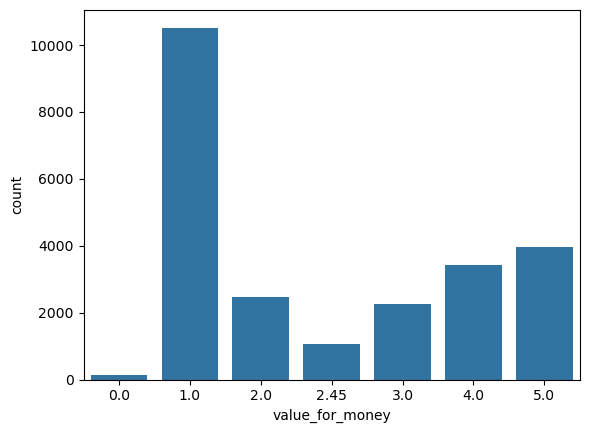

In [33]:
for columns in numerical_df:
    sns.countplot(x=numerical_df[columns], data=numerical_df)
    plt.show()
#majority of overall_ratings are 1
#majority of other ratings are quite low (between 1 and 3) 

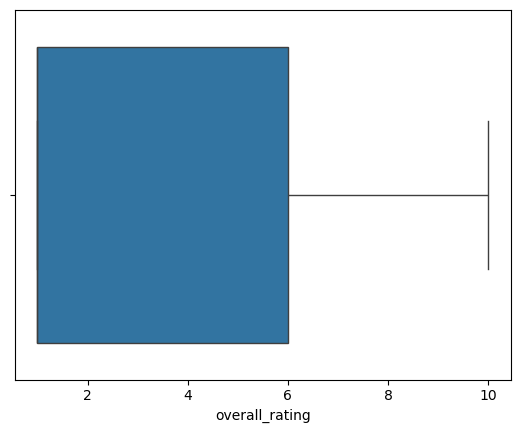

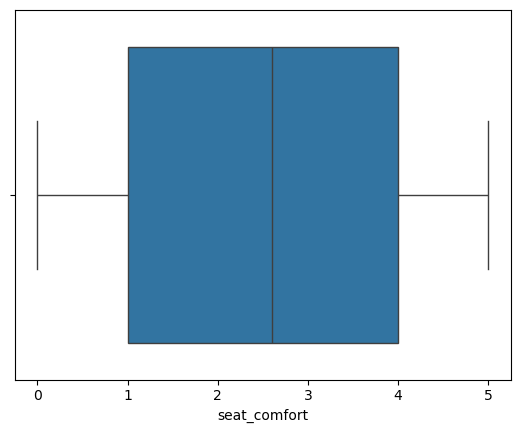

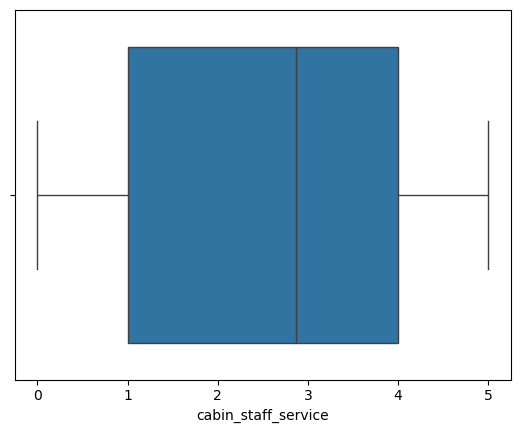

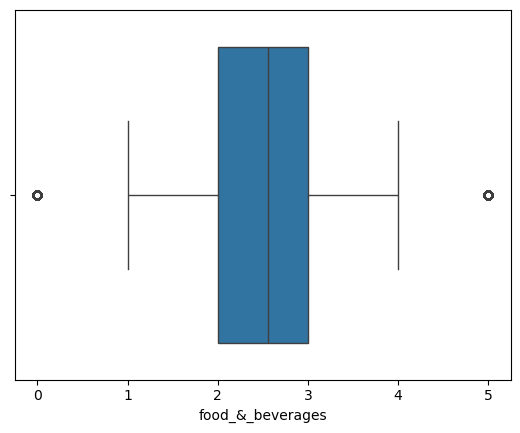

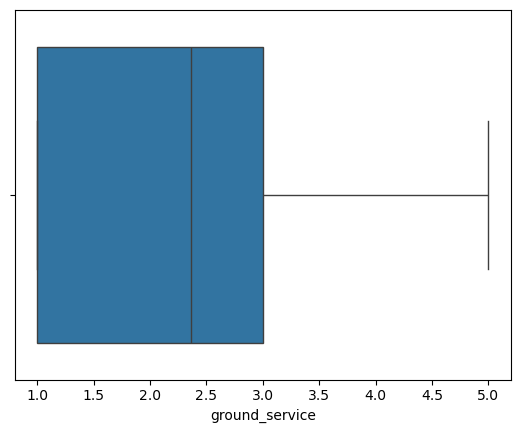

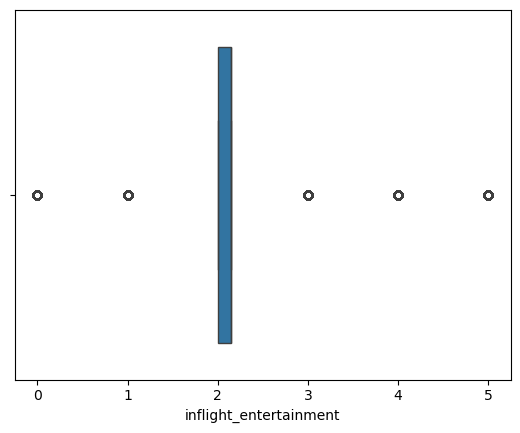

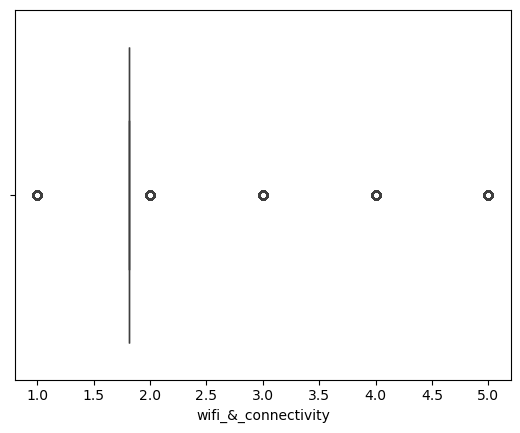

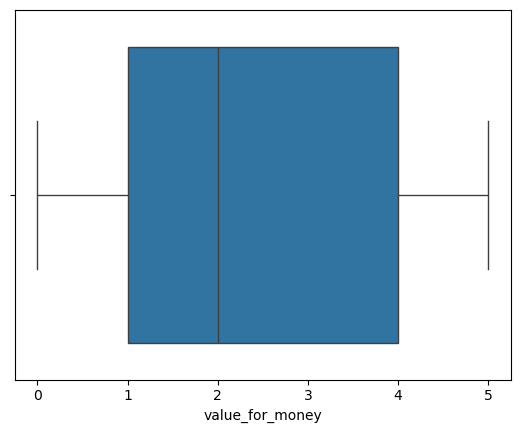

In [34]:
#Due to their discrete nature, we could plot the variables in a boxplot to search for outliers but the result wouldn't make much sense 
#In fact less represented values would be showing as outliers when they can not really be considered as that

for columns in numerical_df:
    sns.boxplot(x=numerical_df[columns])
    plt.show()

    *Looking at the inter-correlation of numerical variables

Text(0.5, 1.0, 'Correlation Matrix')

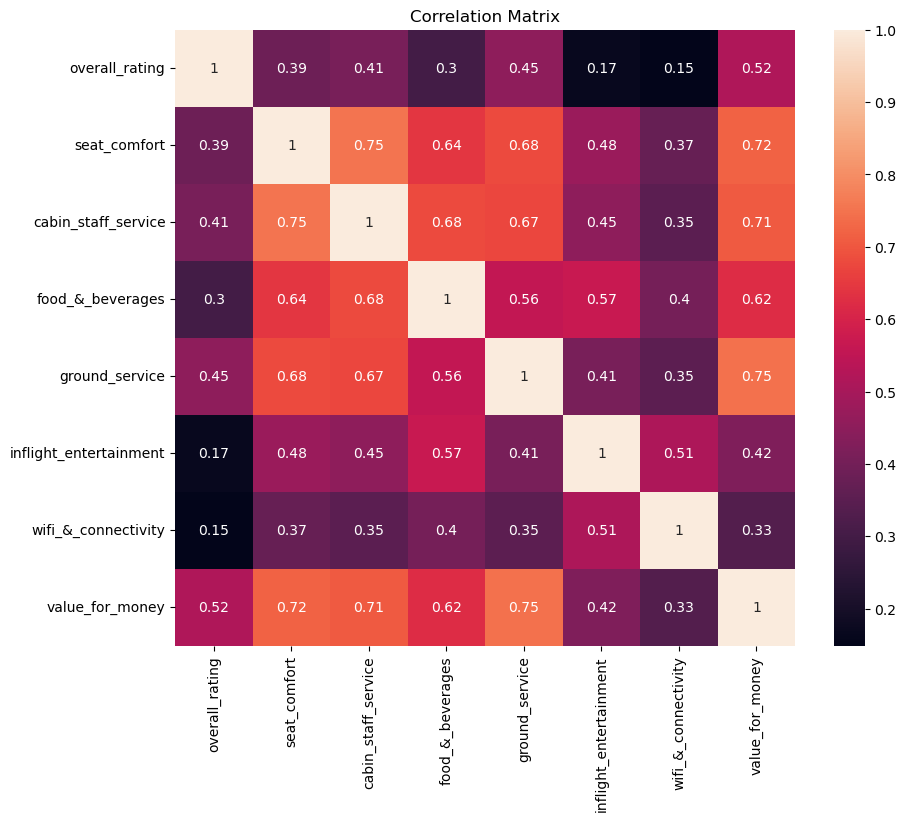

In [35]:
corr_matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show
plt.title('Correlation Matrix')
#there is no high correlation (>0.85) that would require to discard some features

* Processing and modelling data

While I kept all of the columns to use because of visualizations purposes later on, some of them will get in the way of building a prediction model.
For this reason I'll drop them and use the new resulting dataframe for modelling.

    *Dropping unnecessary columns

In [36]:
#I'll drop 'airline_name','departure_place' and 'arrival_place' :
model_df = data.drop(['airline_name','departure_place','arrival_place'],axis=1)
model_df

,overall_rating,verified,aircraft,type_of_traveller,seat_type,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,recommended,month_flown,year_flown,review_month,review_year,time_before_review,delay_cancellation
0,9,True,Unknown,Solo Leisure,Economy Class,4.0,5.00,4.00,4.00,2.15,1.81,3.0,yes,November,2019.0,November,2019,1 month,False
1,1,True,Others,Solo Leisure,Economy Class,2.0,2.00,1.00,1.00,2.15,1.81,2.0,no,June,2019.0,June,2019,1 month,False
2,1,True,Others,Solo Leisure,Economy Class,2.0,1.00,1.00,1.00,2.15,1.81,2.0,no,June,2019.0,June,2019,1 month,False
3,1,False,Unknown,Solo Leisure,Economy Class,1.0,1.00,2.56,1.00,2.15,1.81,1.0,no,September,2019.0,September,2019,1 month,True
4,1,True,Unknown,Couple Leisure,Economy Class,1.0,1.00,1.00,1.00,1.00,1.00,1.0,no,September,2019.0,September,2019,1 month,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23847,1,False,Unknown,Couple Leisure,Economy Class,2.0,1.00,2.56,1.00,1.00,1.00,1.0,no,June,2022.0,July,2022,1 month,False
23848,1,True,Unknown,Solo Leisure,Economy Class,2.6,2.87,2.56,2.36,2.15,1.81,1.0,no,June,2022.0,June,2022,1 month,False
23849,3,True,Unknown,Business,Economy Class,2.0,4.00,2.00,1.00,2.15,1.81,2.0,no,May,2022.0,May,2022,1 month,False
23850,6,True,Others,Business,Business Class,3.0,4.00,3.00,1.00,2.00,5.00,5.0,yes,May,2022.0,May,2022,1 month,False


    *Splitting into train and test set

In [37]:
# separating the data using a train-test-split
y = model_df['overall_rating']
X = model_df.drop(['overall_rating'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# and resetting the index
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

    *Separating X into numerical and categorical

In [38]:
def split_num_cat(df):
    df_num = df.select_dtypes(include=np.number)
    df_cat = df.select_dtypes(include=['object','bool'])
    return df_num, df_cat

X_train_num, X_train_cat = split_num_cat(X_train)
X_test_num, X_test_cat = split_num_cat(X_test)

    *Processing X numerical

In [39]:
X_train_num.describe().T
#there's no noticeable scale difference between variables that would justify scaling/normalizing
#I'll keep the data as is without processing it

,count,mean,std,min,25%,50%,75%,max
seat_comfort,19081.0,2.596656,1.338529,0.0,1.00,2.60,4.00,5.0
cabin_staff_service,19081.0,2.857146,1.461282,0.0,1.00,2.87,4.00,5.0
food_&_beverages,19081.0,2.553541,1.215243,0.0,2.00,2.56,3.00,5.0
ground_service,19081.0,2.356658,1.436830,1.0,1.00,2.36,3.00,5.0
inflight_entertainment,19081.0,2.153029,1.016096,0.0,2.00,2.15,2.15,5.0
wifi_&_connectivity,19081.0,1.808830,0.703830,1.0,1.81,1.81,1.81,5.0
value_for_money,19081.0,2.447209,1.560723,0.0,1.00,2.00,4.00,5.0


    *Processing X categorical

In [40]:
X_train_cat.describe().T
#there's no hierarchical order in those categories aside for time_before_review so I'll use OneHot Encoder and Ordinal Encoder for the latter

,count,unique,top,freq
verified,19081,2,True,10174
aircraft,19081,25,Unknown,13167
type_of_traveller,19081,5,Solo Leisure,5846
seat_type,19081,5,Economy Class,15794
recommended,19081,2,no,12684
month_flown,19081,13,Unknown,2943
year_flown,19081.0,13.0,2023.0,5292.0
review_month,19081,12,January,1817
review_year,19081,23,2023,5239
time_before_review,19081,4,1 month,14126


In [41]:
#splitting categoricals for onehot or ordinal encoding:

train_ordinal_cat = X_train_cat[['time_before_review']]
train_OneHot_cat = X_train_cat.drop(['time_before_review'], axis=1)

test_ordinal_cat = X_test_cat[['time_before_review']]
test_OneHot_cat = X_test_cat.drop(['time_before_review'], axis=1)
test_OneHot_cat.dtypes

verified                bool
aircraft              object
type_of_traveller     object
seat_type             object
recommended           object
month_flown           object
year_flown            object
review_month          object
review_year           object
delay_cancellation    object
dtype: object

In [42]:
#Encoders require their input to be uniformly strings or numbers and the year columns contain float and string so we'll need to change them:
def correct_type(df):
    df['year_flown']=df['year_flown'].astype('str')
    df['review_year']=df['review_year'].astype('str')
    return df

correct_type(train_OneHot_cat)
correct_type(test_OneHot_cat)

,verified,aircraft,type_of_traveller,seat_type,recommended,month_flown,year_flown,review_month,review_year,delay_cancellation
0,True,Boeing 787,Solo Leisure,Economy Class,yes,December,2017.0,July,2018,False
1,False,Unknown,Solo Leisure,Economy Class,no,January,2016.0,January,2016,True
2,False,Unknown,Family Leisure,First Class,no,February,2017.0,March,2017,False
3,True,Unknown,Couple Leisure,Economy Class,no,November,2023.0,November,2023,False
4,False,Unknown,Family Leisure,Economy Class,yes,October,2022.0,October,2022,False
...,...,...,...,...,...,...,...,...,...,...
4766,True,Unknown,Family Leisure,Economy Class,yes,October,2022.0,April,2023,False
4767,True,Unknown,Business,Economy Class,no,June,2022.0,June,2022,False
4768,False,Others,Solo Leisure,Economy Class,no,September,2016.0,September,2016,True
4769,True,Unknown,Family Leisure,Economy Class,no,July,2022.0,August,2022,False


In [43]:
# Encoding our data with OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(train_OneHot_cat)
encoded_cat = encoder.transform(train_OneHot_cat).toarray()
cols = encoder.get_feature_names_out(input_features=train_OneHot_cat.columns)
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)

#applying encoder on our test set:
encoded_test_cat = encoder.transform(test_OneHot_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test

,verified_True,aircraft_A320,aircraft_A320-200,aircraft_A321,aircraft_A330,aircraft_A330-200,aircraft_A330-300,aircraft_A340,aircraft_A350,aircraft_A350-900,aircraft_A380,aircraft_Boeing 737,aircraft_Boeing 737-700,aircraft_Boeing 737-800,aircraft_Boeing 757,aircraft_Boeing 767,aircraft_Boeing 777,aircraft_Boeing 777-300,aircraft_Boeing 777-300ER,aircraft_Boeing 787,aircraft_Boeing 787-8,aircraft_Boeing 787-9,aircraft_E190,aircraft_Others,aircraft_Unknown,type_of_traveller_Couple Leisure,type_of_traveller_Family Leisure,type_of_traveller_Solo Leisure,type_of_traveller_Unknown,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy,seat_type_Unknown,recommended_yes,month_flown_August,month_flown_December,month_flown_February,month_flown_January,month_flown_July,month_flown_June,month_flown_March,month_flown_May,month_flown_November,month_flown_October,month_flown_September,month_flown_Unknown,year_flown_2014.0,year_flown_2015.0,year_flown_2016.0,year_flown_2017.0,year_flown_2018.0,year_flown_2019.0,year_flown_2020.0,year_flown_2021.0,year_flown_2022.0,year_flown_2023.0,year_flown_2024.0,year_flown_Unknown,review_month_August,review_month_December,review_month_February,review_month_January,review_month_July,review_month_June,review_month_March,review_month_May,review_month_November,review_month_October,review_month_September,review_year_2003,review_year_2004,review_year_2005,review_year_2006,review_year_2007,review_year_2008,review_year_2009,review_year_2010,review_year_2011,review_year_2012,review_year_2013,review_year_2014,review_year_2015,review_year_2016,review_year_2017,review_year_2018,review_year_2019,review_year_2020,review_year_2021,review_year_2022,review_year_2023,review_year_2024,delay_cancellation_True
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,1.0,0.0,0.0,0.

In [44]:
# Encoding our data with OrdinalEncoder

encoder2 = OrdinalEncoder().fit(train_ordinal_cat)
encoded_cat2 = encoder2.transform(train_ordinal_cat)
cols2 = encoder2.get_feature_names_out(input_features=train_ordinal_cat.columns)
ordinal_encoded = pd.DataFrame(encoded_cat2, columns=cols2)

#applying encoder on our test set:
encoded_test_cat2 = encoder2.transform(test_ordinal_cat)
ordinal_encoded_test = pd.DataFrame(encoded_test_cat2, columns=cols2)
ordinal_encoded_test

,time_before_review
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4766,0.0
4767,1.0
4768,1.0
4769,1.0


In [45]:
# Concatenating our numerical and categorical data:

X_train_treated = pd.concat([X_train_num, onehot_encoded, ordinal_encoded], axis=1)
display(X_train_treated)
X_test_treated = pd.concat([X_test_num, onehot_encoded_test, ordinal_encoded_test], axis=1)


,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,verified_True,aircraft_A320,aircraft_A320-200,aircraft_A321,aircraft_A330,aircraft_A330-200,aircraft_A330-300,aircraft_A340,aircraft_A350,aircraft_A350-900,aircraft_A380,aircraft_Boeing 737,aircraft_Boeing 737-700,aircraft_Boeing 737-800,aircraft_Boeing 757,aircraft_Boeing 767,aircraft_Boeing 777,aircraft_Boeing 777-300,aircraft_Boeing 777-300ER,aircraft_Boeing 787,aircraft_Boeing 787-8,aircraft_Boeing 787-9,aircraft_E190,aircraft_Others,aircraft_Unknown,type_of_traveller_Couple Leisure,type_of_traveller_Family Leisure,type_of_traveller_Solo Leisure,type_of_traveller_Unknown,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy,seat_type_Unknown,recommended_yes,month_flown_August,month_flown_December,month_flown_February,month_flown_January,month_flown_July,month_flown_June,month_flown_March,month_flown_May,month_flown_November,month_flown_October,month_flown_September,month_flown_Unknown,year_flown_2014.0,year_flown_2015.0,year_flown_2016.0,year_flown_2017.0,year_flown_2018.0,year_flown_2019.0,year_flown_2020.0,year_flown_2021.0,year_flown_2022.0,year_flown_2023.0,year_flown_2024.0,year_flown_Unknown,review_month_August,review_month_December,review_month_February,review_month_January,review_month_July,review_month_June,review_month_March,review_month_May,review_month_November,review_month_October,review_month_September,review_year_2003,review_year_2004,review_year_2005,review_year_2006,review_year_2007,review_year_2008,review_year_2009,review_year_2010,review_year_2011,review_year_2012,review_year_2013,review_year_2014,review_year_2015,review_year_2016,review_year_2017,review_year_2018,review_year_2019,review_year_2020,review_year_2021,review_year_2022,review_year_2023,review_year_2024,delay_cancellation_True,time_before_review
0,4.0,4.00,3.00,4.00,2.15,1.81,5.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.6,2.87,2.56,2.36,2.15,1.81,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
2,1.0,1.00,2.56,1.00,2.15,1.81,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,5.00,5.00,5.00,5.00,4.00,5.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,2.00,2.56,1.00,2.15,1.81,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [46]:
#checking that all our data is numeric and ready to build the model:

X_train_treated.select_dtypes(np.number)
X_test_treated.select_dtypes(np.number)
    #all 100 columns are returned meaning they all contain numerical values

,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,inflight_entertainment,wifi_&_connectivity,value_for_money,verified_True,aircraft_A320,aircraft_A320-200,aircraft_A321,aircraft_A330,aircraft_A330-200,aircraft_A330-300,aircraft_A340,aircraft_A350,aircraft_A350-900,aircraft_A380,aircraft_Boeing 737,aircraft_Boeing 737-700,aircraft_Boeing 737-800,aircraft_Boeing 757,aircraft_Boeing 767,aircraft_Boeing 777,aircraft_Boeing 777-300,aircraft_Boeing 777-300ER,aircraft_Boeing 787,aircraft_Boeing 787-8,aircraft_Boeing 787-9,aircraft_E190,aircraft_Others,aircraft_Unknown,type_of_traveller_Couple Leisure,type_of_traveller_Family Leisure,type_of_traveller_Solo Leisure,type_of_traveller_Unknown,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy,seat_type_Unknown,recommended_yes,month_flown_August,month_flown_December,month_flown_February,month_flown_January,month_flown_July,month_flown_June,month_flown_March,month_flown_May,month_flown_November,month_flown_October,month_flown_September,month_flown_Unknown,year_flown_2014.0,year_flown_2015.0,year_flown_2016.0,year_flown_2017.0,year_flown_2018.0,year_flown_2019.0,year_flown_2020.0,year_flown_2021.0,year_flown_2022.0,year_flown_2023.0,year_flown_2024.0,year_flown_Unknown,review_month_August,review_month_December,review_month_February,review_month_January,review_month_July,review_month_June,review_month_March,review_month_May,review_month_November,review_month_October,review_month_September,review_year_2003,review_year_2004,review_year_2005,review_year_2006,review_year_2007,review_year_2008,review_year_2009,review_year_2010,review_year_2011,review_year_2012,review_year_2013,review_year_2014,review_year_2015,review_year_2016,review_year_2017,review_year_2018,review_year_2019,review_year_2020,review_year_2021,review_year_2022,review_year_2023,review_year_2024,delay_cancellation_True,time_before_review
0,4.0,5.0,4.00,4.0,4.00,1.81,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,2.56,1.0,2.15,1.81,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2.0,2.0,2.00,3.0,2.00,2.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,3.0,1.00,3.0,3.00,1.81,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5.0,5.0,2.56,5.0,2.15,1.81,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

    *Choosing best model

The most common machine learning models for regression are:
* LinearRegression(): which assumes there's a linear relationship between features and target, normality, independence, no multicolinearity and uniform variance accross all levels of features
* Ridge Regression(): penalizes large coefficients by squaring them to prevent overfitting and improve the generalization of the model, a also has the advantage  ohandlingle multicollinearity (when independent variables are highly correled)
* LASSO Regression(): solve the problem of overfitting when the number of independent variables is large,  unlike Ridgefficients equal toro, effectively pe
* Decision Tree Based Regression(): can handle both categorical and numerical independent variables, can handle missing data (compare the results with other tree-based algorithms such as Random Forest and Gradient Boosting)
* Support Vector Regression (SVR)(): can handle non-linear and non-separable data, is robust to outliersorming feature selection. ).

In [47]:
models_to_test=[LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]

In [48]:
def train_test_model(list):
    for values in list:
        m=values
        m.fit(X_train_treated, y_train)
        pred_train = m.predict(X_train_treated)
        score_train = round(r2_score(y_train, pred_train),3)
        pred_test = m.predict(X_test_treated)
        score_test = round(r2_score(y_test, pred_test),3)
        mae = round(mean_absolute_error(y_test, pred_test),2)
        print(values)
        print(f"train score: {score_train} | test score: {score_test} | mean absolute error: {mae}")
    return

In [49]:
train_test_model(models_to_test)

LinearRegression()
train score: 0.484 | test score: 0.48 | mean absolute error: 1.59
Ridge()
train score: 0.484 | test score: 0.479 | mean absolute error: 1.6
Lasso()
train score: 0.225 | test score: 0.222 | mean absolute error: 2.25
DecisionTreeRegressor()
train score: 0.945 | test score: 0.292 | mean absolute error: 1.39
RandomForestRegressor()
train score: 0.9 | test score: 0.571 | mean absolute error: 1.23
SVR()
train score: 0.578 | test score: 0.565 | mean absolute error: 1.24


Considering the metrics, RandomForest is the regression model that explains the most variance in our data (57%) and has one of the smallest mae with model predictions off about 1.24 points from the actual overall rating.

    *Improving the RandomForest Regression model

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

* n_estimators:  defines the number of trees to be used in the mode.
* max_features:  limits a count to select the maximum features in each tre.
* max_depth:  determines the maximum number of splits each tree can take. If too low, the modelis undertrained and hase a high bia. Iif oo thigh, the modelis overtrained and haso high varianc.
* max_leaf_nodes:  restricts the growth of each tre.. .  

In [51]:
#determining multiple values to test and improve the model after looking at sklearn's documentation 
param_grid = {'n_estimators': [25, 50, 100, 150, 200],
              'max_depth': [3, 6, 9, 12],
              'max_features': ['sqrt', 'log2', None],
              'max_leaf_nodes': [3, 6, 9, 12]} 

In [52]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid) 
grid_search.fit(X_train_treated, y_train) 
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=12, max_features=None, max_leaf_nodes=12,
                      n_estimators=150)


In [53]:
#Using the best parameters found by GridSearch 
model=RandomForestRegressor(max_depth = 9, max_features = None, max_leaf_nodes = 12)
model.fit(X_train_treated, y_train)
pred_train = model.predict(X_train_treated)
score_train = round(r2_score(y_train, pred_train),3)
pred_test = model.predict(X_test_treated)
score_test = round(r2_score(y_test, pred_test),3)
mae = round(mean_absolute_error(y_test, pred_test),2)
print('Hyperparameter Tuning with GridSearchCV')
print(f"train score: {score_train} | test score: {score_test} | mean absolute error: {mae}")

Hyperparameter Tuning with GridSearchCV
train score: 0.559 | test score: 0.547 | mean absolute error: 1.43


In [54]:
random_search = RandomizedSearchCV(RandomForestRegressor(), param_grid) 
random_search.fit(X_train_treated, y_train) 
print(random_search.best_estimator_) 

RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=6,
                      n_estimators=50)


In [55]:
model=RandomForestRegressor(n_estimators = 50, max_depth = 9, max_features = None, max_leaf_nodes = 12)
model.fit(X_train_treated, y_train)
pred_train = model.predict(X_train_treated)
score_train = round(r2_score(y_train, pred_train),3)
pred_test = model.predict(X_test_treated)
score_test = round(r2_score(y_test, pred_test),3)
mae = round(mean_absolute_error(y_test, pred_test),2)
print('Hyperparameter Tuning with RandomizedSearch')
print(f"train score: {score_train} | test score: {score_test} | mean absolute error: {mae}")

Hyperparameter Tuning with RandomizedSearch
train score: 0.561 | test score: 0.548 | mean absolute error: 1.43


Hyperparameter tuning did not lead to better metrics for the model so I'll stick with the default parameters.